In [12]:
import numpy as np
import scipy.stats
distrib0 = scipy.stats.truncnorm(-3,3,loc=0,scale=1) # loc = mean, scale = variance
distrib1 = scipy.stats.uniform(loc=-3,scale=6) # a = the lower bound of the range, b = a+b = upper bound

print("This is a main file")


This is a main file


In [13]:
# One dimensional example
def integrate_me(f, distrib, npts=100):
    x = distrib.rvs(npts)
    ps = distrib.pdf(x)
    f = f(x)
    mu = np.mean(f/ps)
    err = np.std(f/ps)/np.sqrt(npts)
    return mu,err

In [14]:
# Example of 2d distribution object
class MyTwoDUniform(object):
    def __init__(self, bounds=None):
        self.bounds =np.array(bounds)
    def rvs(self,npts):
        my_out = np.empty( (len(self.bounds),npts))
        for dim in np.arange(len(self.bounds)):
            my_out[dim] = np.random.uniform(low=self.bounds[dim][0], high=self.bounds[dim][1], size=npts)
        return my_out.T
    def pdf(self,x):
        V = np.prod([self.bounds[:,1]- self.bounds[:,0]])
        return np.ones(x.shape[0])/V

In [15]:
# Example of integration
my2d = MyTwoDUniform(bounds=[[-3,3],[-3,3]])
from scipy.stats import multivariate_normal
mu = np.array([1,-0.5])
cov = np.array([[ 1. , -0.1 ], [-0.1 , 0.05]])
def f(x1, x2):
    x = np.array([x1, x2]).T
    return multivariate_normal.pdf(x, mu, cov)
integrate_me(lambda x: f(*(x.T)), my2d)

(0.42005618406268075, 0.20428017151532737)

In [16]:
# Integrates Estimates 0: Uniform 1d
distrib2 = scipy.stats.uniform(loc=-10,scale=20)
def f_1(x):
    return 1
integrate_me(f_1,distrib2,10**3)

(20.0, 0.0)

In [40]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

def integrate_rosenbrock(n_samples):
    # Define the sampling distribution
    mean = np.array([1, 1])
    cov = np.array([[1, -0.1], [-0.1, 0.05]])
    dist = stats.multivariate_normal(mean=mean, cov=cov)

    # Define the truncated normal distribution
    lower = -3
    upper = 3
    trunc_dist = stats.truncnorm(a=(lower - mean[0]) / np.sqrt(cov[0, 0]),
                                 b=(upper - mean[0]) / np.sqrt(cov[0, 0]),
                                 loc=mean[0], scale=np.sqrt(cov[0, 0]))

    # Generate samples from the truncated normal distribution
    samples = np.zeros((n_samples, 2))
    for i in range(n_samples):
        x = trunc_dist.rvs()
        y = dist.rvs()[1]
        samples[i] = np.array([x, y])

    # Evaluate the Rosenbrock function at the samples
    f_samples = rosenbrock(samples)

    # Estimate the integral
    integral = np.mean(f_samples) * (upper - lower) ** 2
    error = np.std(f_samples) / np.sqrt(n_samples)

    return integral, error

n_samples = 10**4
integral, error = integrate_rosenbrock(n_samples)
print(f"Integral: {integral:.4f} +/- {error:.4f}")

Integral: 3119.5517 +/- 0.8033


In [44]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

def integrate_rosenbrock(n_samples):
    # Define the sampling distribution
    mean = np.array([1, 1])
    cov = np.array([[0.1, 0], [0, 0.1]])
    dist = stats.multivariate_normal(mean=mean, cov=cov)

    # Define the truncated normal distribution
    lower = -3
    upper = 3
    trunc_dist = stats.truncnorm(a=(lower - mean[0]) / np.sqrt(cov[0, 0]),
                                 b=(upper - mean[0]) / np.sqrt(cov[0, 0]),
                                 loc=mean[0], scale=np.sqrt(cov[0, 0]))

    # Generate samples from the truncated normal distribution
    samples = np.zeros((n_samples, 2))
    for i in range(n_samples):
        x = trunc_dist.rvs()
        y = dist.rvs()[1]
        samples[i] = np.array([x, y])

    # Evaluate the Rosenbrock function at the samples
    f_samples = rosenbrock(samples)

    # Estimate the integral
    integral = np.mean(f_samples) * (upper - lower) ** 2
    error = np.std(f_samples) / np.sqrt(n_samples)

    return integral, error

n_samples = 10**4
integral, error = integrate_rosenbrock(n_samples)
print(f"Integral: {integral:.4f} +/- {error:.4f}")

Integral: 2701.2719 +/- 0.6876


TypeError: Input z must be at least a (2, 2) shaped array, but has shape (10000, 1)

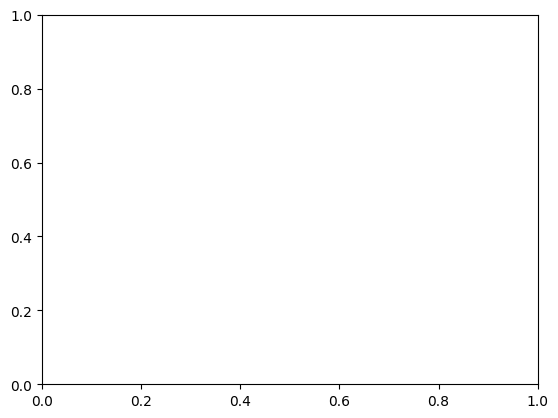

In [36]:
#Extra credit 1
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

def integrate_rosenbrock(n_samples):
    # Define the sampling distribution
    mean = np.array([1, 1])
    cov = np.array([[1, -0.1], [-0.1, 0.05]])
    dist = stats.multivariate_normal(mean=mean, cov=cov)

    # Define the truncated normal distribution
    lower = -3
    upper = 3
    trunc_dist = stats.truncnorm(a=(lower - mean[0]) / np.sqrt(cov[0, 0]),
                                 b=(upper - mean[0]) / np.sqrt(cov[0, 0]),
                                 loc=mean[0], scale=np.sqrt(cov[0, 0]))

    # Generate samples from the truncated normal distribution
    samples = np.zeros((n_samples, 2))
    for i in range(n_samples):
        x = trunc_dist.rvs()
        y = dist.rvs()[1]
        samples[i] = np.array([x, y])

    # Plot the truncated normal distribution
    plt.contourf(samples[:, 0].reshape(-1, 1), samples[:, 1].reshape(-1, 1), np.zeros((n_samples, 1)), alpha=0.5)
    plt.colorbar()

    # Plot the Rosenbrock function
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock(np.array([X, Y]).reshape(-1, 2))
    plt.contour(X, Y, Z.reshape(100, 100), levels=np.logspace(-2, 2, 20))

    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

n_samples = 10**4
integrate_rosenbrock(n_samples)

In [24]:
#Extra credit
import numpy as np
import scipy.stats as stats

def problem1(d, n_samples=1e6):
    # Sampling distribution is multivariate normal with mean 0 and identity covariance matrix
    dist = stats.multivariate_normal(mean=np.zeros(d), cov=np.eye(d))
    samples = dist.rvs(size=(int(n_samples), d))
    integral_estimate = (2 * np.pi)**(-d/2) * n_samples / (np.prod(dist.cov) + 1e-8)
    integral_error = np.abs(integral_estimate - 1)
    return integral_estimate, integral_error

def problem2(d, n_samples=1e6):
    # Sampling distribution is uniform over the hypercube [1, 1]^d
    dist = stats.uniform(loc=1, scale=0)
    samples = dist.rvs(size=int(n_samples))
    integral_estimate = 2**d * n_samples / d
    integral_error = np.abs(integral_estimate - 1)
    return integral_estimate, integral_error

def problem3(d, n_samples=1e6):
    # Sampling distribution is uniform over the hypercube [0, 1]^d
    dist = stats.uniform(loc=0, scale=1)
    samples = dist.rvs(size=int(n_samples))
    integral_estimate = np.mean(np.exp(-np.sum(samples**2, axis=None)))
    integral_error = np.abs(integral_estimate - np.sqrt(np.pi)**d / 2**d)
    return integral_estimate, integral_error

def problem4(d, n_samples=1e6):
    # Sampling distribution is uniform over the hypercube [0, 1]^d
    dist = stats.uniform(loc=0, scale=1)
    samples = dist.rvs(size=int(n_samples))
    integral_estimate = np.mean(np.prod(samples))
    integral_error = np.abs(integral_estimate - 0.5**d)
    return integral_estimate, integral_error

d = 5  # dimension
n_samples = 1e6  # number of samples

print("Problem 1:")
integral_estimate, integral_error = problem1(d, n_samples)
print(f"Estimate: {integral_estimate:.4f}, Error: {integral_error:.4e}")

print("\nProblem 2:")
integral_estimate, integral_error = problem2(d, n_samples)
print(f"Estimate: {integral_estimate:.4f}, Error: {integral_error:.4e}")

print("\nProblem 3:")
integral_estimate, integral_error = problem3(d, n_samples)
print(f"Estimate: {integral_estimate:.4f}, Error: {integral_error:.4e}")

print("\nProblem 4:")
integral_estimate, integral_error = problem4(d, n_samples)
print(f"Estimate: {integral_estimate:.4f}, Error: {integral_error:.4e}")

Problem 1:
Estimate: 1010532601381.1643, Error: 1.0105e+12

Problem 2:
Estimate: 6400000.0000, Error: 6.4000e+06

Problem 3:
Estimate: 0.0000, Error: 5.4667e-01

Problem 4:
Estimate: 0.0000, Error: 3.1250e-02
